# DATA ANALYSIS OF DIABETES DATABASE

# 1. import libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")#call the class for adaboost
from sklearn.ensemble import AdaBoostClassifier

# 2. load dataset

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 3. Explore dataset

In [4]:
#check null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
#check inormation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#display all rows
pd.set_option('display.max_rows',None)

In [7]:
#display all columns
pd.set_option('display.max_columns',None)

In [8]:
#seperate the independent (input X) and dependent (output Y) variable
X=df.drop("Outcome",axis=1)
Y=df["Outcome"]

In [9]:
#call class for training and testing
from sklearn.model_selection import train_test_split

In [10]:
#split data into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state=1)

In [11]:
#create function which will be used for training and testing 

In [12]:
#create a function
def create_model(model):
    model.fit(X_train,Y_train)#to train
    y_pred=model.predict(X_test)
    print(classification_report(Y_test,y_pred))
    return model

In [13]:
#as we have used classification report we hhave to call the class for it
from sklearn.metrics import classification_report

# BASELINE MODEL USING LOGISTIC REGRESSION

# 1st ALGORITHM
LOGISTIC CLASSIFICATION

In [14]:
#call class for logistic regression
from sklearn.linear_model import LogisticRegression

In [15]:
#create object for LogisticRegression class
lr=LogisticRegression()

In [16]:
#call the function "create_model"(for training and testing)
create_model(lr)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



LogisticRegression()

In [17]:
#here we have not applied data analysis, so because of this model is getting overfit
#we will use DecisionTreeClassifier as it will select the important features

# 2nd ALGORITHM
DECISION TREE

In [18]:
#call the class for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [19]:
#create object of DecisionTreeClassifier class
dt=DecisionTreeClassifier()

In [20]:
#call function "create_model"(for training and testing)
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       146
           1       0.59      0.52      0.55        85

    accuracy                           0.69       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



In [21]:
#to check the information gain (if information gain is high then the column will be important for making tree)
dt.feature_importances_

array([0.03771144, 0.28327943, 0.1508791 , 0.06703787, 0.04572726,
       0.18585411, 0.12313373, 0.10637705])

In [22]:
#call the class for tree
from sklearn import tree

In [23]:
#keep all the input variables in features
features=X.columns

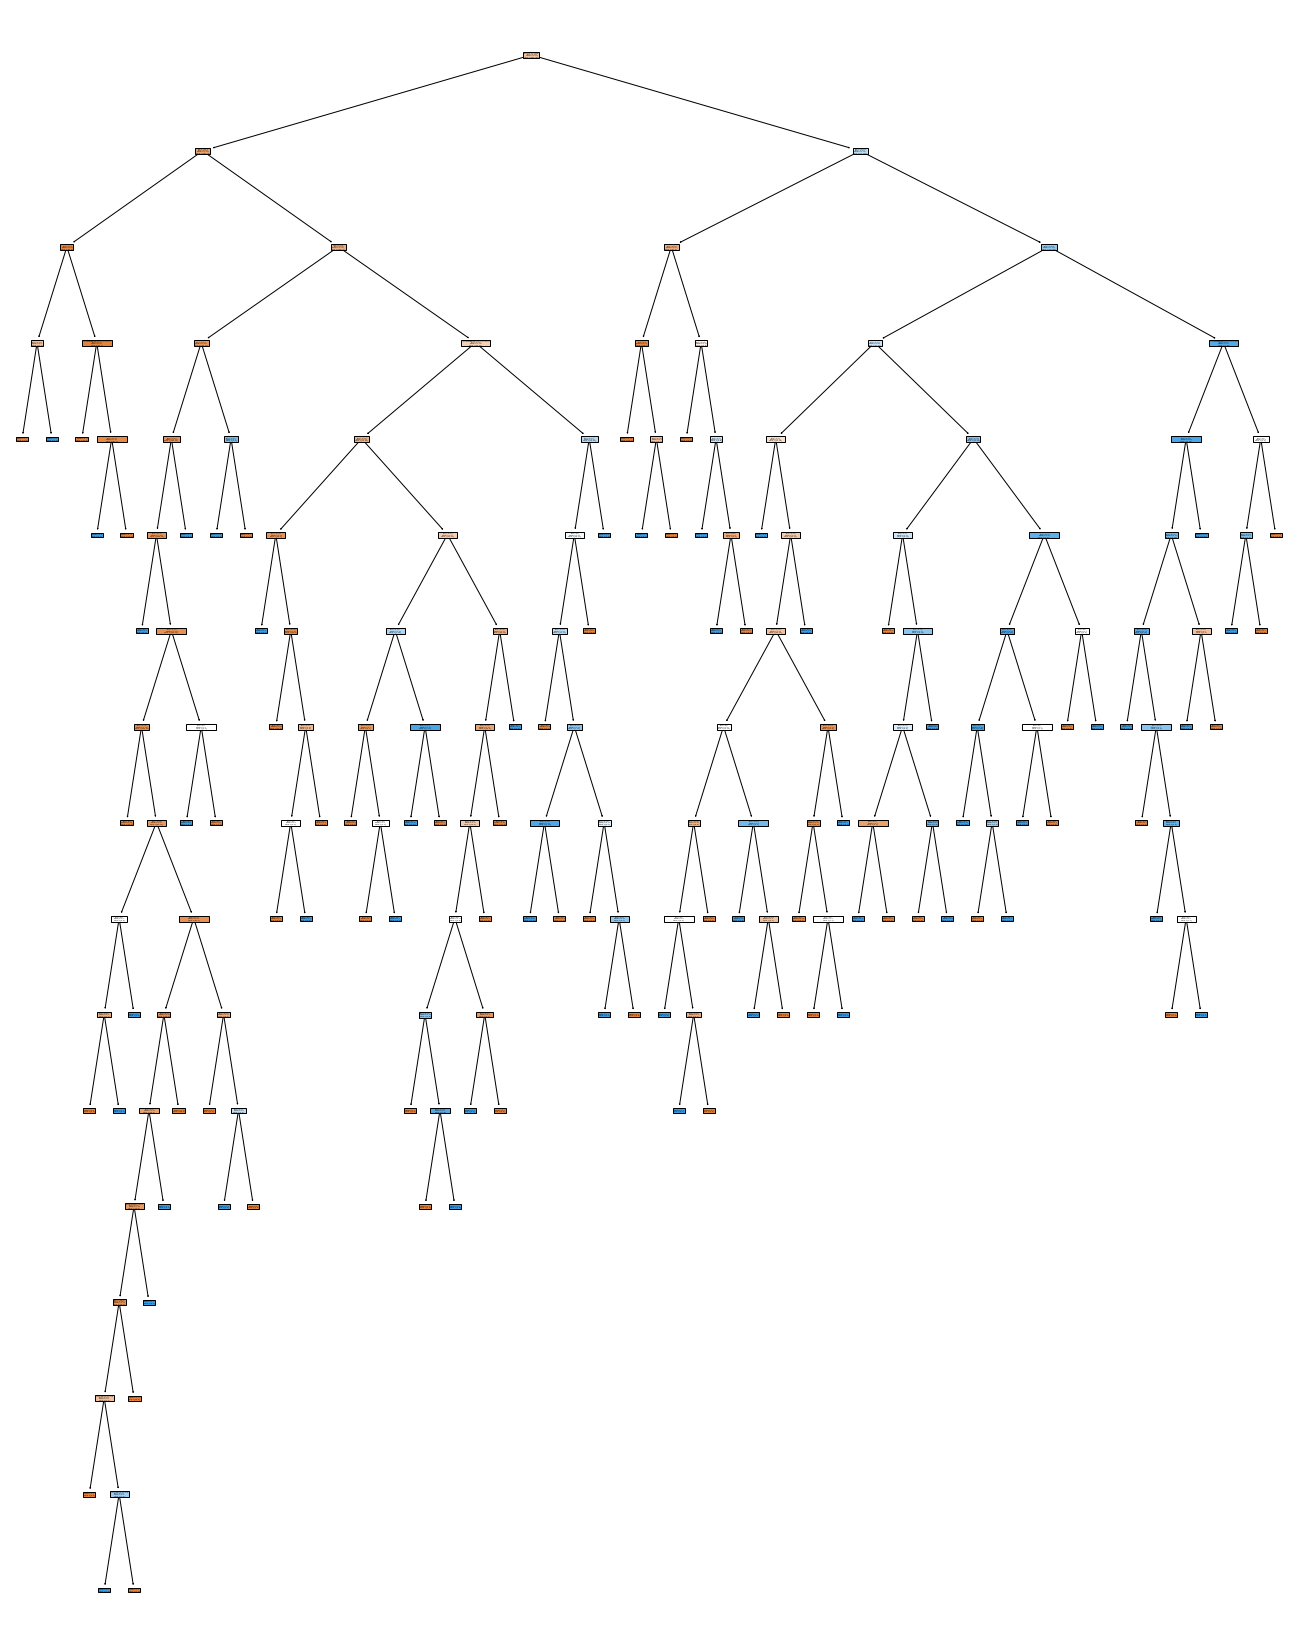

In [24]:
#draw the tree
fig=plt.figure(figsize=(23,30))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [25]:
#(1) max_depth 
#we create a different object of DecisionTreeClasiifier and pass parameter for max_depth
dt1=DecisionTreeClassifier(max_depth=5) #not mpore than 8

In [26]:
#call function "create_model"(for training and testing)
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       146
           1       0.71      0.67      0.69        85

    accuracy                           0.78       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



In [27]:
#it is giving good recall when the max_depth is 5 i.e 0.67

In [28]:
#(2) min_sample_leaf
#we create a different object of DecisionTreeClasiifier and pass parameter for min_sample_leaf
dt2=DecisionTreeClassifier(min_samples_leaf=45) #min 50

In [29]:
#call function "create_model"(for training and testing)
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       146
           1       0.74      0.71      0.72        85

    accuracy                           0.80       231
   macro avg       0.79      0.78      0.78       231
weighted avg       0.80      0.80      0.80       231



In [30]:
#(3) entropy
#we create a different object of DecisionTreeClasiifier and pass parameter for min_sample_leaf
dt3=DecisionTreeClassifier(min_samples_leaf=40,criterion="entropy")

In [31]:
#call function "create_model"(for training and testing)
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       146
           1       0.72      0.67      0.70        85

    accuracy                           0.78       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



# 3rd ALGORITHM
SUPPORT VECTOR MACHINE (SVM)

In [32]:
#call class form svm
from sklearn.svm import LinearSVC

In [33]:
#(1) Linear kernel (if suppose data is dsitributed lineraly)

In [34]:
#create object for LinearSVC
svc=LinearSVC(random_state=1,C=0.0012) #c is paramete for adding error

In [35]:
#call function "create_model"(for training and testing)
create_model(svc)

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       146
           1       0.59      0.28      0.38        85

    accuracy                           0.66       231
   macro avg       0.63      0.58      0.57       231
weighted avg       0.64      0.66      0.63       231



LinearSVC(C=0.0012, random_state=1)

# ENSEMBLING TECHNIQUE

# 1. ADABOOST

In [36]:
#call the class for adaboost
from sklearn.ensemble import AdaBoostClassifier

In [37]:
#create object of Adaboost
ada=AdaBoostClassifier(n_estimators=100)

In [38]:
#call function "create_model"
create_model(ada)

              precision    recall  f1-score   support

           0       0.82      0.88      0.84       146
           1       0.76      0.66      0.70        85

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.77       231
weighted avg       0.79      0.80      0.79       231



AdaBoostClassifier(n_estimators=100)

# 2. GRADIENT BOOST

In [39]:
#call the class for GradientBoost
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
#create object of GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100)

In [41]:
#call function"create_model"
create_model(gbc)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       146
           1       0.75      0.65      0.70        85

    accuracy                           0.79       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.79      0.79       231



GradientBoostingClassifier()

# 3. NAIVE 

In [42]:
#create model list
model_list=[("Logistic",lr),("DecisonTree",dt),("DecisionTreeEntropy",dt3)]

In [43]:
#call class for hard voting
from sklearn.ensemble import VotingClassifier

In [44]:
# (A) HARD VOTING

In [45]:
#create object of VotingClassifier
vc=VotingClassifier(estimators=model_list) #by default it takes hard voting so if we are not specifying it will take hard voting

In [46]:
#call function "create_model"
create_model(vc)

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       146
           1       0.74      0.61      0.67        85

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



VotingClassifier(estimators=[('Logistic', LogisticRegression()),
                             ('DecisonTree', DecisionTreeClassifier()),
                             ('DecisionTreeEntropy',
                              DecisionTreeClassifier(criterion='entropy',
                                                     min_samples_leaf=40))])

In [47]:
# (B) SOFT VOTING

In [48]:
#create object of VotingClassifier (for soft voting)
vc=VotingClassifier(estimators=model_list,voting="soft") 

In [49]:
#call function "create_model"
create_model(vc)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       146
           1       0.75      0.58      0.65        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



VotingClassifier(estimators=[('Logistic', LogisticRegression()),
                             ('DecisonTree', DecisionTreeClassifier()),
                             ('DecisionTreeEntropy',
                              DecisionTreeClassifier(criterion='entropy',
                                                     min_samples_leaf=40))],
                 voting='soft')

# 4. BOOTSTRAPING

In [50]:
#create model list
model_list=[("Logistic",lr),("DecisonTree",dt),("DecisionTreeEntropy",dt3)]

In [51]:
#call class for BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# (A) BAGGING

In [52]:
#create object of BaggingClassifier
bc=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=10,random_state=1) #bydefault it is bagging

In [53]:
#call function "create_model"
create_model(bc)

              precision    recall  f1-score   support

           0       0.70      0.95      0.80       146
           1       0.76      0.31      0.44        85

    accuracy                           0.71       231
   macro avg       0.73      0.63      0.62       231
weighted avg       0.72      0.71      0.67       231



BaggingClassifier(base_estimator=LogisticRegression(), max_samples=10,
                  random_state=1)

# (B) PASTING

In [54]:
#create object of BaggingClassifier
bc1=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=10,random_state=1,bootstrap=False)

In [55]:
#call function "create_model"
create_model(bc1)

              precision    recall  f1-score   support

           0       0.74      0.86      0.79       146
           1       0.66      0.47      0.55        85

    accuracy                           0.71       231
   macro avg       0.70      0.66      0.67       231
weighted avg       0.71      0.71      0.70       231



BaggingClassifier(base_estimator=LogisticRegression(), bootstrap=False,
                  max_samples=10, random_state=1)

# (C) RANDOM FOREST

In [56]:
#call class for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [57]:
#create object of RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,max_features=7,random_state=1)

In [58]:
#call function "create_model"
create_model(rf)

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       146
           1       0.75      0.52      0.61        85

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



RandomForestClassifier(max_features=7, n_estimators=10, random_state=1)

# FEATURE SELECTION TECHNIQUE

# A . ANOVA TEST

In [59]:
from sklearn.feature_selection import f_regression #f_regression is for anova test
from sklearn.feature_selection import SelectKBest
#selectKBest is important object

In [60]:
#create object for SlectKBest class
anova=SelectKBest(score_func=f_regression,k=6) #k is no of columns/feature which retrive 10 imp features after fit_transform()
#anov auser define object

In [61]:
#train data and return 10 best column and store in X_train_imp
X_train_imp=anova.fit_transform(X_train,Y_train)

In [62]:
#test the data
X_test_imp=anova.transform(X_test)

In [63]:
#check which features are selected and which are rejected
anova.get_support() #return ans in boolean type 0 means false 1 means true

array([ True,  True, False, False,  True,  True,  True,  True])

In [64]:
#again create object of logistic regression after anova test
lr1=LogisticRegression()

In [65]:
#train model
lr1.fit(X_train_imp,Y_train)

LogisticRegression()

In [66]:
#check the score
lr1.score(X_test_imp,Y_test)

0.7748917748917749

In [67]:
#CHI SQUARE TEST

In [68]:
# before applying chi square test to check which if column has non negative
for col in X:
    print("column name:",col)
    print(df[col].unique())

column name: Pregnancies
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
column name: Glucose
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
column name: BloodPressure
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
column name: SkinThickness
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 4

In [69]:
#call class for chi square test
from sklearn.feature_selection import chi2

In [70]:
#create object
chi=SelectKBest(score_func=chi2,k=6)

In [71]:
#train data and return 10 best column and store in X_train_imp
X_train_imp=chi.fit_transform(X_train,Y_train)

In [72]:
#test the data
X_test_imp=anova.transform(X_test)

In [73]:
#check which features are selected and which are rejected
anova.get_support() #return ans in boolean type 0 means false 1 means true

array([ True,  True, False, False,  True,  True,  True,  True])

In [74]:
#again create object of logistic regression after anova test
lr1=LogisticRegression()

In [75]:
#train model
lr1.fit(X_train_imp,Y_train)

LogisticRegression()

In [76]:
#check the score
lr1.score(X_test_imp,Y_test)

0.6320346320346321

# 2. WRAPPER METHOD 

# A. Forward Selection

In [77]:
#declare empty list for the columns
columns=[]

In [78]:
for col in X:
    columns.append(col)
    X_new=df[columns] #input variable
    X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y,test_size=0.3,random_state=1)
    #create a object of LogisticRegression
    lin=LogisticRegression()
    #we train the model
    lin.fit(X_train,Y_train)
    #find the score
    score1=lin.score(X_test,Y_test)
    print("Column : ",col, " Score : ",score1)

Column :  Pregnancies  Score :  0.6536796536796536
Column :  Glucose  Score :  0.7532467532467533
Column :  BloodPressure  Score :  0.7619047619047619
Column :  SkinThickness  Score :  0.7705627705627706
Column :  Insulin  Score :  0.7748917748917749
Column :  BMI  Score :  0.7835497835497836
Column :  DiabetesPedigreeFunction  Score :  0.7878787878787878
Column :  Age  Score :  0.7835497835497836


# SAMPLING TECHNIQUE

In [79]:
#to count how many yes and how many no
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

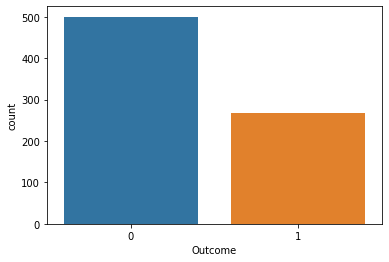

In [80]:
#display using countplot
sns.countplot(data=df,x="Outcome")
plt.show()

In [81]:
#call class for over sampling and under sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# (1) Over Sampling

In [82]:
#count yes and no begore applying sampling
pd.Series(Y_train).value_counts()

0    354
1    183
Name: Outcome, dtype: int64

In [83]:
#create object of RandomOverSampler
ros= RandomOverSampler()

In [84]:
#train the data using sampling 
X_sample2,y_sample2 = ros.fit_sample(X_train,Y_train)

In [85]:
#count yes and no after appyling sampling
pd.Series(y_sample2).value_counts()

1    354
0    354
Name: Outcome, dtype: int64

In [86]:
#now apply the Decision tree (of classification algorithm) using purning technique
dt4= DecisionTreeClassifier(max_depth=4)

In [87]:
#now train the model
dt4.fit(X_sample2,y_sample2)

DecisionTreeClassifier(max_depth=4)

In [88]:
#now test the model
y_pred=dt4.predict(X_test)

In [89]:
#classification report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78       146
           1       0.62      0.85      0.72        85

    accuracy                           0.75       231
   macro avg       0.75      0.77      0.75       231
weighted avg       0.79      0.75      0.76       231



# (2) Under sampling

In [90]:
#create object of RandomUnderSampler
rus=RandomUnderSampler()

In [91]:
#train the data using sampling 
X_sample1,y_sample1 = rus.fit_sample(X_train,Y_train)

In [92]:
#count yes and no after appyling sampling
pd.Series(y_sample1).value_counts()

1    183
0    183
Name: Outcome, dtype: int64

In [93]:
#now apply the Decision tree (of classification algorithm) using purning technique
dt5= DecisionTreeClassifier(max_depth=3)

In [94]:
#now train the model
dt5.fit(X_sample1,y_sample1)

DecisionTreeClassifier(max_depth=3)

In [95]:
#now test the model
y_pred=dt5.predict(X_test)

In [96]:
#classification report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.62      0.74       146
           1       0.58      0.89      0.70        85

    accuracy                           0.72       231
   macro avg       0.75      0.76      0.72       231
weighted avg       0.79      0.72      0.73       231

